#### Preamble

In [1]:
<< "MaTeX`"
<< "~/Documentos/Wolfram Mathematica/Wolfram_scripts/Maxima_Minima.wls"
<< "~/Documentos/Wolfram Mathematica/Wolfram_scripts/Optics_Mie.wls"
<< "~/Documentos/Wolfram Mathematica/Wolfram_scripts/Optical_functions/Au_JohnsnChristy.wls"                                                                 

In [5]:
fs = 9;

texStyle := {FontFamily -> "Latin Modern Roman", FontSize -> fs, Black};
graphsOpts := {Mesh -> Full, BaseStyle -> texStyle, Frame -> True, 
            FrameStyle -> Black, ImageSize -> 215, PlotStyle -> ColorData[3]}
            
SetOptions[ListLinePlot, graphsOpts];
SetOptions[ListPlot, graphsOpts];
SetOptions[ListLogPlot, graphsOpts];

graphsOptsPolar := {Mesh -> Full, BaseStyle -> texStyle,  PolarAxes -> True ,
            FrameStyle -> Black, ImageSize -> 215, PlotStyle -> ColorData[3], Frame -> False, PolarGridLines -> Automatic, Joined -> True}
SetOptions[ListPolarPlot, graphsOptsPolar];

#### Data

In [14]:
files = FileNames["*.csv", "RawData"]
data = Import[#, "Data"]& /@ files;
data = Drop[#, 5]& /@ data;    (*Droping comments of each file*)

{RawData/01-Efficiencies-BOX-default-parameters.csv, 
 
>   RawData/02-Efficiencies-BOX-Matrix-size-LSPR-Ext.csv, 
 
>   RawData/02-Efficiencies-BOX-Matrix-size-LSPR-Sca.csv, 
 
>   RawData/03-Efficiencies-BOX-Matrix-size-LSPR-Ext.csv, 
 
>   RawData/03-Efficiencies-BOX-Matrix-size-LSPR-Sca.csv, 
 
>   RawData/04-Efficiencies-BOX-Matrix-size-lda-LSPR-Ext.csv, 
 
>   RawData/04-Efficiencies-BOX-Matrix-size-lda-LSPR-Sca.csv, 
 
>   RawData/05-Efficiencies-BOX-Matrix-size-lda-LSPR-Ext.csv, 
 
>   RawData/05-Efficiencies-BOX-Matrix-size-lda-LSPR-Sca.csv, 
 
>   RawData/06-Efficiencies-BOX-PML-size-LSPR-Ext.csv, 
 
>   RawData/06-Efficiencies-BOX-PML-size-LSPR-Sca.csv, 
 
>   RawData/07-Efficiencies-BOX-PML-size-LSPR-Ext.csv, 
 
>   RawData/07-Efficiencies-BOX-PML-size-LSPR-Sca.csv, 
 
>   RawData/08-Efficiencies-BOX-PML-size-LSPR-Ext.csv, 
 
>   RawData/08-Efficiencies-BOX-PML-size-LSPR-Sca.csv, 
 
>   RawData/09-Efficiencies-BOX-PML-size-LSPR-Ext.csv, 
 
>   RawData/09-Efficiencies-BOX-PML-size-LSPR-Sca.csv, 
 
>   RawData/10-Efficiencies-BOX-PML-size-LSPR-Ext.csv, 
 
>   RawData/10-Efficiencies-BOX-PML-size-LSPR-Sca.csv, 
 
>   RawData/11-Efficiencies-BOX-PML-size-LSPR-Ext.csv, 
 
>   RawData/11-Efficiencies-BOX-PML-size-LSPR-Sca.csv, RawData/12-Efficiencias-air.csv, 
 
>   RawData/12-Efficiencias-glass.csv}

## 

In [17]:
radius = 12.5; (* nm *)
nNP = JohnsonChristyAuRefSize[#, radius]&;
nMat = 1.&;
 
scatteringQ[wl_] := Map[ MieScatteringQ[ {nMat[#], nNP[#]}, #, radius]&, toMap[wl] ]
extinctionQ[wl_] := Map[ MieExtinctionQ[ {nMat[#], nNP[#]}, #, radius]&, toMap[wl] ]

### No convergence

In [56]:
i = 1;
wlength = data[[i, ;; ,2]];
plots = { 0, 0};

sca = scatteringQ[wlength];
ext = extinctionQ[wlength];
abs = ext - sca;

mesh = DeleteDuplicates @ Sort @ Join[Range[400,600,10],Range[500,520]];

1
Legended[-Graphics-, Placed[SwatchLegend[{Directive[PointSize[--], 
                                                              72
 
>       AbsoluteThickness[1.6], FontFamily -> Latin Modern Roman, FontSize -> 9, 
 
                                                   1
>       RGBColor[0., 0., 0.]], Directive[PointSize[--], AbsoluteThickness[1.6], 
                                                   72
 
>       FontFamily -> Latin Modern Roman, FontSize -> 9, 
 
>       RGBColor[0.996078, 0.360784, 0.027451]], 
 
                           1
>      Directive[PointSize[--], AbsoluteThickness[1.6], 
                           72
 
>       FontFamily -> Latin Modern Roman, FontSize -> 9, 
 
>       RGBColor[0.996078, 0.988235, 0.0352941]]}, 
 
>     {Q_\text{sca}\times 100, Q_\text{abs}, Q_\text{ext}}, LegendMarkers -> Automatic, 
 
>     LabelStyle -> {}, LegendLabel -> 
 
>      LineLegend[{GrayLevel[0], GrayLevel[0]}, {Mie, FEM}, LegendLayout -> Row, 
 
>       LegendMarkers -> {None, -Graphics-}], LegendLayout -> Row], {Left, Bottom}, 
 
>    Identity]]
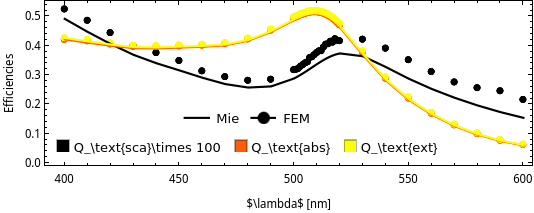

In [63]:
(* Order of the efficencies sca, abs, ext*)
i = 1;
amp = 100; (*Qext / Qsca ~ 100*)
order = {3, 4, 5};


plots[[1]] = Show[{
    ListLinePlot[If[# == 3, 
               data[[i, ;; , {2, #}]] /. {x_, y_} -> {x, amp*y},
               (*else*)
               data[[i, ;; , {2, #}]]
             ] & /@ order,
            FrameLabel -> { "$\\lambda$ [nm]", "Efficiencies"}, 
            PlotLegends -> Placed[
                                SwatchLegend[Automatic, 
                                {"Q_\\text{sca}\\times " <> ToString[amp], "Q_\\text{abs}", "Q_\\text{ext}"},
                                LegendLayout -> "Row",
                                LegendLabel ->  LineLegend[{Black, Black}, 
                                                              {"Mie", "FEM"}, 
                                                             LegendLayout -> "Row",
                                                             LegendMarkers -> {None, Graphics[Disk[]]}]],
                                {Left, Bottom}],
            ImageSize -> 400,
            Joined -> False,
            AspectRatio -> 1/2.96
    ],
  ListLinePlot[Transpose[{wlength,#}]& /@ {sca*amp, abs, ext}, Mesh -> None]
  }]

-Graphics-
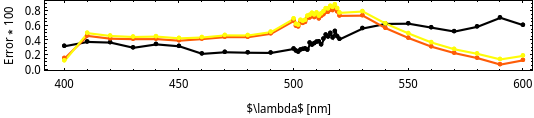

In [68]:
error = 100* Which[ # == 5, Abs[ext-data[[i, ;;, #]]],
                 # == 4, Abs[abs - data[[i, ;;, #]]],
                 # == 3,10* Abs[sca - data[[i, ;;, #]]]
        ] & /@ order;
        

plots[[2]] = ListPlot[Transpose[{wlength,#}]& /@ error,
        FrameLabel -> { "$\\lambda$ [nm]", "Error * 100"}, 
        ImageSize -> 400,
        AspectRatio -> 1/7,
        Joined -> True,
        DataRange -> wlength[[{1,-1}]]
]

In [341]:
Export["0-NoConv-"<>ToString[#]<>".pdf", plots[[#]]]&/@Range[Length[plots]]

{0-NoConv-1.pdf, 0-NoConv-2.pdf}

### Matrix Size Air 1

In [568]:
plots = { 0, 0};

-Graphics-
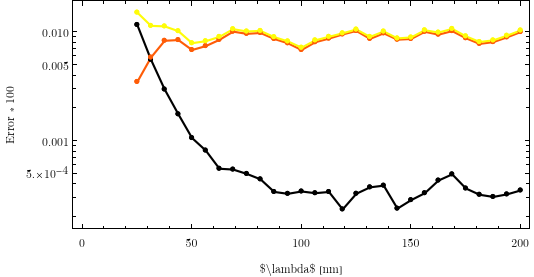

In [345]:
i = 2;
nMat = 1.&;
wlength = data[[i, ;; ,1]];
sca = scatteringQ[wlength];
ext = extinctionQ[wlength];
abs = ext - sca;

dist = data[[i,;;,2]];
dist = radius * Range[2., 16., .5];

order = {3, 4, 5};
error =  Which[ # == 5, Abs[ext-data[[i, ;;, #]]],
                 # == 4, Abs[abs - data[[i, ;;, #]]],
                 # == 3, Abs[sca - data[[i, ;;, #]]]
        ] & /@ order;

plots[[1]] = ListLogPlot[Transpose[{dist,#}]& /@ error,
        FrameLabel -> { "$\\lambda$ [nm]", "Error * 100"}, 
        ImageSize -> 400,
        AspectRatio -> 1/2,
        Joined -> True,
        DataRange -> wlength[[{1,-1}]]
]

-Graphics-
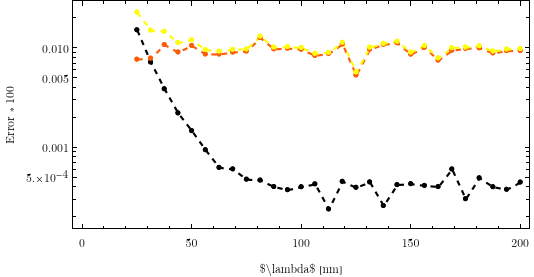

In [580]:
i = 3;

wlength = data[[i, ;; ,1]];
sca = scatteringQ[wlength];
ext = extinctionQ[wlength];
abs = ext - sca;

dist = data[[i,;;,2]];
dist = radius * Range[2., 16., .5];

order = {3, 4, 5};
error =  Which[ # == 5, Abs[ext-data[[i, ;;, #]]],
                 # == 4, Abs[abs - data[[i, ;;, #]]],
                 # == 3, Abs[sca - data[[i, ;;, #]]]
        ] & /@ order;

plots[[2]] = ListLogPlot[Transpose[{dist,#}]& /@ error,
        FrameLabel -> { "$\\lambda$ [nm]", "Error * 100"}, 
        ImageSize -> 400,
        AspectRatio -> 1/2,
        Joined -> True,
        PlotStyle -> (Directive[Dashed,ColorData[3,#]]&/@{1,2,3}),
        DataRange -> wlength[[{1,-1}]]
]

-Graphics-
1-Air.pdf
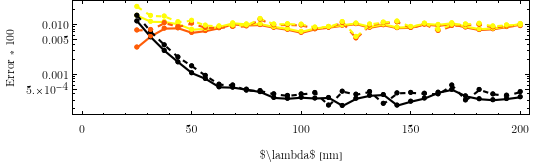

In [590]:
plots = Show[plots, AspectRatio -> 1/4, PlotRange -> Full]
Export["1-Air.pdf", plots]

### MAtrix Size Air 2

In [621]:
plots = { 0, 0};

{101.4, 152.1, 202.8, 253.5, 304.2, 354.9, 405.6, 456.3, 507, 557.7, 608.4, 659.1, 
 
>   709.8, 760.5, 811.2, 861.9, 912.6, 963.3, 1014}
-Graphics-
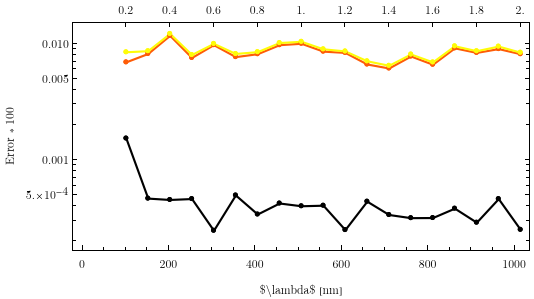

In [622]:
i = 6;
nMat = 1.&;
wlength = data[[i, ;; ,1]];
sca = scatteringQ[wlength];
ext = extinctionQ[wlength];
abs = ext - sca;

dist = data[[i,;;,2]] * wlength
uppet = {wlength[[1]]*#,#} &/@ Range[.2,2,.2];

order = {3, 4, 5};
error =  Which[ # == 5, Abs[ext-data[[i, ;;, #]]],
                 # == 4, Abs[abs - data[[i, ;;, #]]],
                 # == 3, Abs[sca - data[[i, ;;, #]]]
        ] & /@ order;

plots[[1]] = ListLogPlot[Transpose[{dist,#}]& /@ error,
        FrameLabel -> { "$\\lambda$ [nm]", "Error * 100"}, 
        ImageSize -> 400,
        FrameTicks -> {{Automatic, Automatic},{Automatic,uppet}},
        AspectRatio -> 1/2,
        Joined -> True,
        DataRange -> wlength[[{1,-1}]]
]



-Graphics-
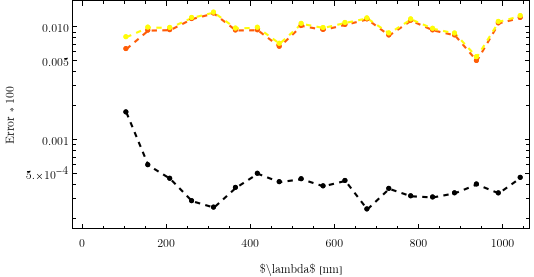

In [633]:
i = 7;

wlength = data[[i, ;; ,1]];
sca = scatteringQ[wlength];
ext = extinctionQ[wlength];
abs = ext - sca;

dist = data[[i,;;,2]]*wlength;

order = {3, 4, 5};
error =  Which[ # == 5, Abs[ext-data[[i, ;;, #]]],
                 # == 4, Abs[abs - data[[i, ;;, #]]],
                 # == 3, Abs[sca - data[[i, ;;, #]]]
        ] & /@ order;

plots[[2]] = ListLogPlot[Transpose[{dist,#}]& /@ error,
        FrameLabel -> { "$\\lambda$ [nm]", "Error * 100"}, 
        ImageSize -> 400,
        AspectRatio -> 1/2,
        Joined -> True,
        PlotStyle -> (Directive[Dashed,ColorData[3,#]]&/@{1,2,3}),
        DataRange -> wlength[[{1,-1}]]
]

-Graphics-
1-Air.pdf
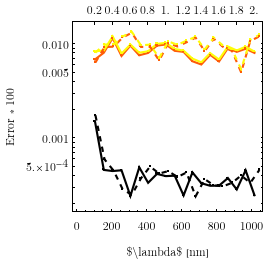

In [642]:
plots = Show[plots, AspectRatio -> 1, PlotRange -> Full, ImageSize -> 200]
Export["1-Air.pdf", plots]

### Matrix Size Glass 1

In [568]:
plots = { 0, 0};

-Graphics-
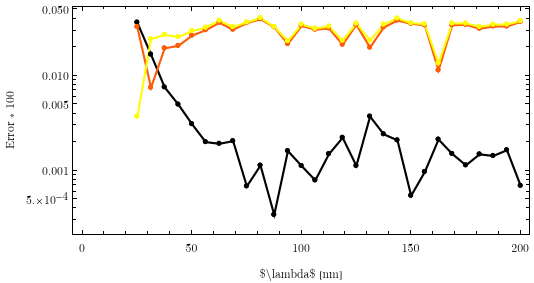

In [593]:
i = 4;
nMat = 1.5&;

wlength = data[[i, ;; ,1]];
sca = scatteringQ[wlength];
ext = extinctionQ[wlength];
abs = ext - sca;

dist = data[[i,;;,2]];
dist = radius * Range[2., 16., .5];

order = {3, 4, 5};
error =  Which[ # == 5, Abs[ext-data[[i, ;;, #]]],
                 # == 4, Abs[abs - data[[i, ;;, #]]],
                 # == 3, Abs[sca - data[[i, ;;, #]]]
        ] & /@ order;

plots[[1]] = ListLogPlot[Transpose[{dist,#}]& /@ error,
        FrameLabel -> { "$\\lambda$ [nm]", "Error * 100"}, 
        ImageSize -> 400,
        AspectRatio -> 1/2,
        Joined -> True,
        DataRange -> wlength[[{1,-1}]]
]

-Graphics-
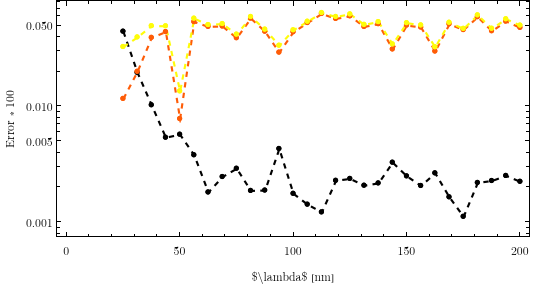

In [604]:
i = 5;

wlength = data[[i, ;; ,1]];
sca = scatteringQ[wlength];
ext = extinctionQ[wlength];
abs = ext - sca;

dist = data[[i,;;,2]];
dist = radius * Range[2., 16., .5];

order = {3, 4, 5};
error =  Which[ # == 5, Abs[ext-data[[i, ;;, #]]],
                 # == 4, Abs[abs - data[[i, ;;, #]]],
                 # == 3, Abs[sca - data[[i, ;;, #]]]
        ] & /@ order;

plots[[2]] = ListLogPlot[Transpose[{dist,#}]& /@ error,
        FrameLabel -> { "$\\lambda$ [nm]", "Error * 100"}, 
        ImageSize -> 400,
        AspectRatio -> 1/2,
        Joined -> True,
        PlotStyle -> (Directive[Dashed,ColorData[3,#]]&/@{1,2,3}),
        DataRange -> wlength[[{1,-1}]]
]

-Graphics-
1-Glass.pdf
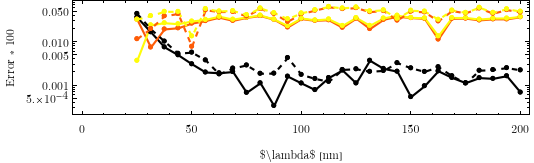

In [614]:
plots = Show[plots, AspectRatio -> 1/4, PlotRange -> Full]
Export["1-Glass.pdf", plots]

### MAtrix Size Glass 2

In [644]:
plots = { 0, 0};

-Graphics-
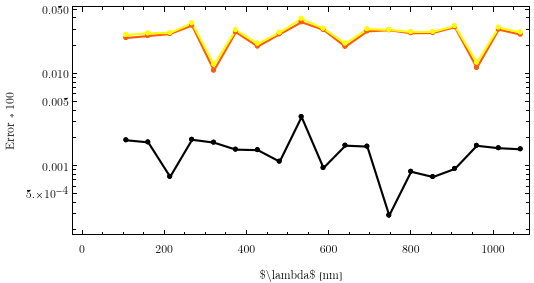

In [645]:
i = 8;
nMat = 1.5&;

wlength = data[[i, ;; ,1]];
sca = scatteringQ[wlength];
ext = extinctionQ[wlength];
abs = ext - sca;

dist = data[[i,;;,2]];
dist = dist * wlength;

order = {3, 4, 5};
error =  Which[ # == 5, Abs[ext-data[[i, ;;, #]]],
                 # == 4, Abs[abs - data[[i, ;;, #]]],
                 # == 3, Abs[sca - data[[i, ;;, #]]]
        ] & /@ order;

plots[[1]] = ListLogPlot[Transpose[{dist,#}]& /@ error,
        FrameLabel -> { "$\\lambda$ [nm]", "Error * 100"}, 
        ImageSize -> 400,
        AspectRatio -> 1/2,
        Joined -> True,
        DataRange -> wlength[[{1,-1}]]
]

-Graphics-
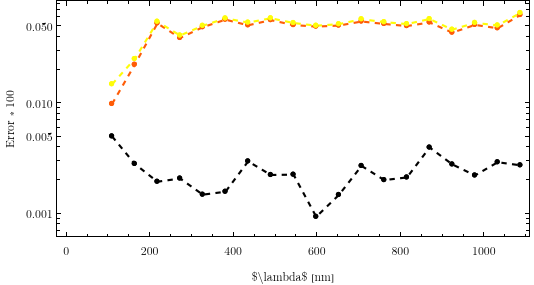

In [656]:
i = 9;

wlength = data[[i, ;; ,1]];
sca = scatteringQ[wlength];
ext = extinctionQ[wlength];
abs = ext - sca;

dist = data[[i,;;,2]];
dist = dist * wlength;

order = {3, 4, 5};
error =  Which[ # == 5, Abs[ext-data[[i, ;;, #]]],
                 # == 4, Abs[abs - data[[i, ;;, #]]],
                 # == 3, Abs[sca - data[[i, ;;, #]]]
        ] & /@ order;

plots[[2]] = ListLogPlot[Transpose[{dist,#}]& /@ error,
        FrameLabel -> { "$\\lambda$ [nm]", "Error * 100"}, 
        ImageSize -> 400,
        AspectRatio -> 1/2,
        Joined -> True,
        PlotStyle -> (Directive[Dashed,ColorData[3,#]]&/@{1,2,3}),
        DataRange -> wlength[[{1,-1}]]
]

-Graphics-
1-Glass.pdf
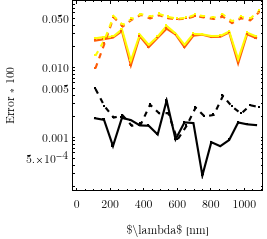

In [666]:
plots = Show[plots, AspectRatio -> 1, PlotRange -> Full, ImageSize -> 200]
Export["1-Glass.pdf", plots]

### PML Size Air

In [71]:
plots = { 0, 0};

-Graphics-
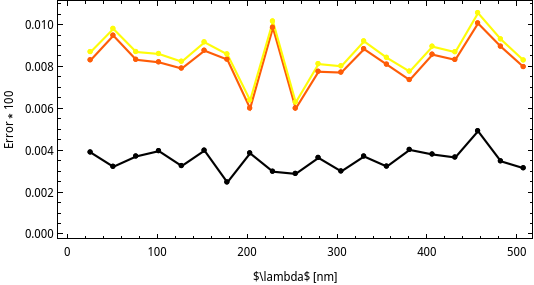

In [72]:
i = 10;
nMat = 1.&;

wlength = data[[i, ;; ,1]];
sca = scatteringQ[wlength];
ext = extinctionQ[wlength];
abs = ext - sca;

dist = data[[i,;;,2]];
dist = dist*wlength;

order = {3, 4, 5};
error =  Which[ # == 5, Abs[ext-data[[i, ;;, #]]],
                 # == 4, Abs[abs - data[[i, ;;, #]]],
                 # == 3, 10*Abs[sca - data[[i, ;;, #]]]
        ] & /@ order;

plots[[1]] = ListPlot[Transpose[{dist,#}]& /@ error,
        FrameLabel -> { "$\\lambda$ [nm]", "Error * 100"}, 
        ImageSize -> 400,
        AspectRatio -> 1/2,
        Joined -> True,
        DataRange -> wlength[[{1,-1}]]
]

-Graphics-
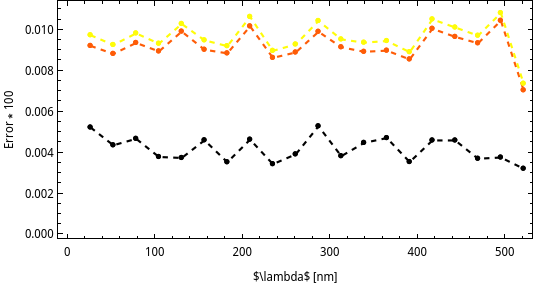

In [83]:
i = 11;

wlength = data[[i, ;; ,1]];
sca = scatteringQ[wlength];
ext = extinctionQ[wlength];
abs = ext - sca;

dist = data[[i,;;,2]];
dist = dist *wlength;

order = {3, 4, 5};
error =  Which[ # == 5, Abs[ext-data[[i, ;;, #]]],
                 # == 4, Abs[abs - data[[i, ;;, #]]],
                 # == 3, 10*Abs[sca - data[[i, ;;, #]]]
        ] & /@ order;

plots[[2]] = ListPlot[Transpose[{dist,#}]& /@ error,
        FrameLabel -> { "$\\lambda$ [nm]", "Error * 100"}, 
        ImageSize -> 400,
        AspectRatio -> 1/2,
        Joined -> True,
        PlotStyle -> (Directive[Dashed,ColorData[3,#]]&/@{1,2,3}),
        DataRange -> wlength[[{1,-1}]]
]

-Graphics-
1-Air.pdf
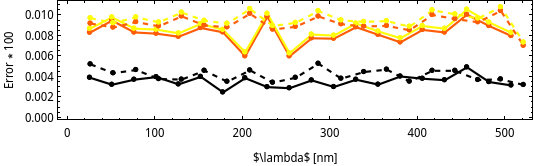

In [93]:
plots = Show[plots, AspectRatio -> 1/4, PlotRange -> Full]
Export["1-Air.pdf", plots]

### PML Glass Size

In [95]:
plots = { 0, 0};

-Graphics-
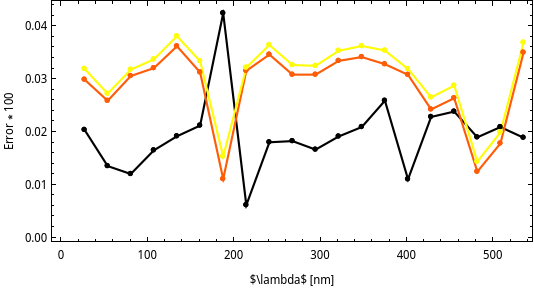

In [96]:
i = 12;
nMat = 1.5&;

wlength = data[[i, ;; ,1]];
sca = scatteringQ[wlength];
ext = extinctionQ[wlength];
abs = ext - sca;

dist = data[[i,;;,2]];
dist = dist*wlength;


order = {3, 4, 5};
error =  Which[ # == 5, Abs[ext-data[[i, ;;, #]]],
                 # == 4, Abs[abs - data[[i, ;;, #]]],
                 # == 3,10* Abs[sca - data[[i, ;;, #]]]
        ] & /@ order;

plots[[1]] = ListPlot[Transpose[{dist,#}]& /@ error,
        FrameLabel -> { "$\\lambda$ [nm]", "Error * 100"}, 
        ImageSize -> 400,
        AspectRatio -> 1/2,
        Joined -> True,
        DataRange -> wlength[[{1,-1}]]
]

-Graphics-
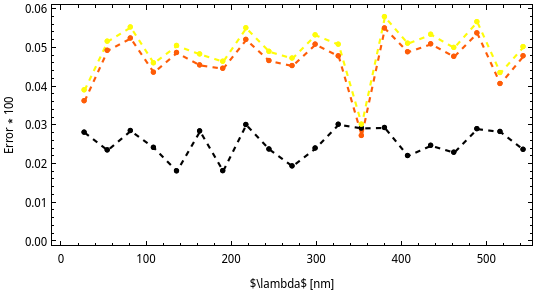

In [107]:
i = 13;

wlength = data[[i, ;; ,1]];
sca = scatteringQ[wlength];
ext = extinctionQ[wlength];
abs = ext - sca;

dist = data[[i,;;,2]];
dist = dist * wlength ;

order = {3, 4, 5};
error =  Which[ # == 5, Abs[ext-data[[i, ;;, #]]],
                 # == 4, Abs[abs - data[[i, ;;, #]]],
                 # == 3,10* Abs[sca - data[[i, ;;, #]]]
        ] & /@ order;

plots[[2]] = ListPlot[Transpose[{dist,#}]& /@ error,
        FrameLabel -> { "$\\lambda$ [nm]", "Error * 100"}, 
        ImageSize -> 400,
        AspectRatio -> 1/2,
        Joined -> True,
        PlotStyle -> (Directive[Dashed,ColorData[3,#]]&/@{1,2,3}),
        DataRange -> wlength[[{1,-1}]]
]

-Graphics-
1-Glass.pdf
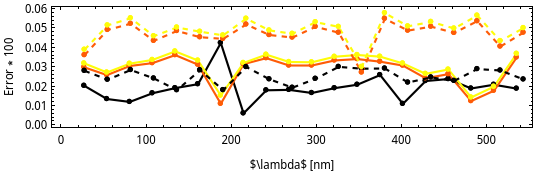

In [117]:
plots = Show[plots, AspectRatio -> 1/4, PlotRange -> Full]
Export["1-Glass.pdf", plots]

## RAdius Mesh Air

In [644]:
plots = { 0, 0};

-Graphics-
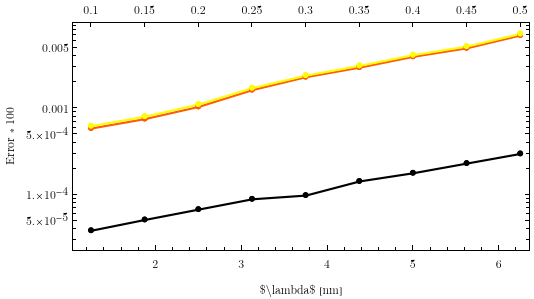

In [645]:
i = 14;
nMat = 1.&;

wlength = data[[i, ;; ,1]];
sca = scatteringQ[wlength];
ext = extinctionQ[wlength];
abs = ext - sca;

dist = data[[i,;;,2]];
dist = dist*radius;
topTicks = Transpose[{dist,dist/radius}];

order = {3, 4, 5};
error =  Which[ # == 5, Abs[ext-data[[i, ;;, #]]],
                 # == 4, Abs[abs - data[[i, ;;, #]]],
                 # == 3, Abs[sca - data[[i, ;;, #]]]
        ] & /@ order;

plots[[1]] = ListLogPlot[Transpose[{dist,#}]& /@ error,
        FrameLabel -> { "$\\lambda$ [nm]", "Error * 100"}, 
        ImageSize -> 400,
        AspectRatio -> 1/2,
        FrameTicks -> {{Automatic,Automatic},{Automatic, topTicks}},
        Joined -> True,
        DataRange -> wlength[[{1,-1}]]
]

-Graphics-
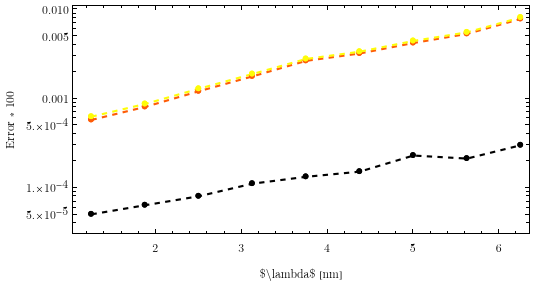

In [657]:
i = 15;

wlength = data[[i, ;; ,1]];
sca = scatteringQ[wlength];
ext = extinctionQ[wlength];
abs = ext - sca;

dist = data[[i,;;,2]];
dist = dist *radius;

order = {3, 4, 5};
error =  Which[ # == 5, Abs[ext-data[[i, ;;, #]]],
                 # == 4, Abs[abs - data[[i, ;;, #]]],
                 # == 3, Abs[sca - data[[i, ;;, #]]]
        ] & /@ order;

plots[[2]] = ListLogPlot[Transpose[{dist,#}]& /@ error,
        FrameLabel -> { "$\\lambda$ [nm]", "Error * 100"}, 
        ImageSize -> 400,
        AspectRatio -> 1/2,
        Joined -> True,
        PlotStyle -> (Directive[Dashed,ColorData[3,#]]&/@{1,2,3}),
        DataRange -> wlength[[{1,-1}]]
]

-Graphics-
1-Air.pdf
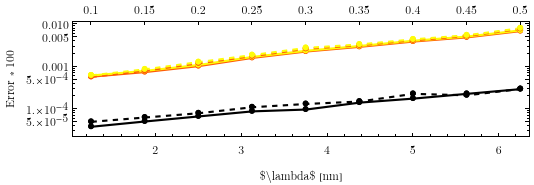

In [667]:
plots = Show[plots, AspectRatio -> 1/4, PlotRange -> Full]
Export["1-Air.pdf", plots]

## RAdius Mesh Glass

In [672]:
plots = { 0, 0};

-Graphics-
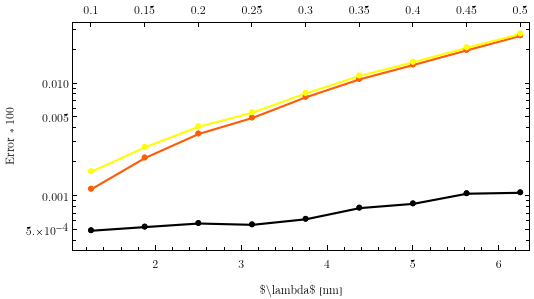

In [673]:
i = 16;
nMat = 1.5&;

wlength = data[[i, ;; ,1]];
sca = scatteringQ[wlength];
ext = extinctionQ[wlength];
abs = ext - sca;

dist = data[[i,;;,2]];
dist = dist*radius;
topTicks = Transpose[{dist,dist/radius}];

order = {3, 4, 5};
error =  Which[ # == 5, Abs[ext-data[[i, ;;, #]]],
                 # == 4, Abs[abs - data[[i, ;;, #]]],
                 # == 3, Abs[sca - data[[i, ;;, #]]]
        ] & /@ order;

plots[[1]] = ListLogPlot[Transpose[{dist,#}]& /@ error,
        FrameLabel -> { "$\\lambda$ [nm]", "Error * 100"}, 
        ImageSize -> 400,
        AspectRatio -> 1/2,
        FrameTicks -> {{Automatic,Automatic},{Automatic, topTicks}},
        Joined -> True,
        DataRange -> wlength[[{1,-1}]]
]

-Graphics-
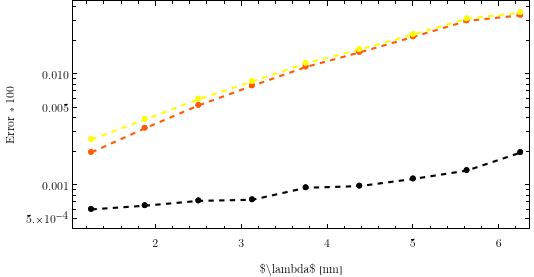

In [685]:
i = 17;

wlength = data[[i, ;; ,1]];
sca = scatteringQ[wlength];
ext = extinctionQ[wlength];
abs = ext - sca;

dist = data[[i,;;,2]];
dist = dist *radius;

order = {3, 4, 5};
error =  Which[ # == 5, Abs[ext-data[[i, ;;, #]]],
                 # == 4, Abs[abs - data[[i, ;;, #]]],
                 # == 3, Abs[sca - data[[i, ;;, #]]]
        ] & /@ order;

plots[[2]] = ListLogPlot[Transpose[{dist,#}]& /@ error,
        FrameLabel -> { "$\\lambda$ [nm]", "Error * 100"}, 
        ImageSize -> 400,
        AspectRatio -> 1/2,
        Joined -> True,
        PlotStyle -> (Directive[Dashed,ColorData[3,#]]&/@{1,2,3}),
        DataRange -> wlength[[{1,-1}]]
]

-Graphics-
1-Glass.pdf
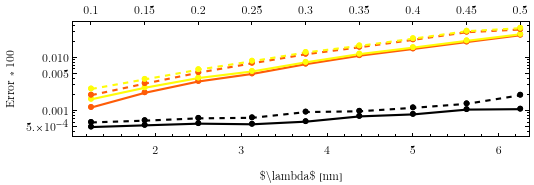

In [695]:
plots = Show[plots, AspectRatio -> 1/4, PlotRange -> Full]
Export["1-Glass.pdf", plots]

## Matrix Mesh Air

In [775]:
plots = { 0, 0};

-Graphics-
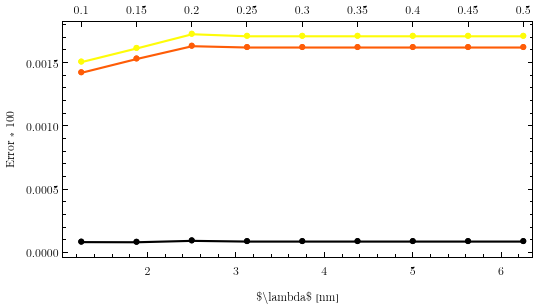

In [776]:
i = 18;
nMat = 1.&;

wlength = data[[i, ;; ,1]];
sca = scatteringQ[wlength];
ext = extinctionQ[wlength];
abs = ext - sca;

dist = data[[i,;;,2]];
dist = dist*radius;
topTicks = Transpose[{dist,dist/radius}];

order = {3, 4, 5};
error =  Which[ # == 5, Abs[ext-data[[i, ;;, #]]],
                 # == 4, Abs[abs - data[[i, ;;, #]]],
                 # == 3, Abs[sca - data[[i, ;;, #]]]
        ] & /@ order;

plots[[1]] = ListPlot[Transpose[{dist,#}]& /@ error,
        FrameLabel -> { "$\\lambda$ [nm]", "Error * 100"}, 
        ImageSize -> 400,
        AspectRatio -> 1/2,
        FrameTicks -> {{Automatic,Automatic},{Automatic, topTicks}},
        Joined -> True,
        DataRange -> wlength[[{1,-1}]]
]

-Graphics-
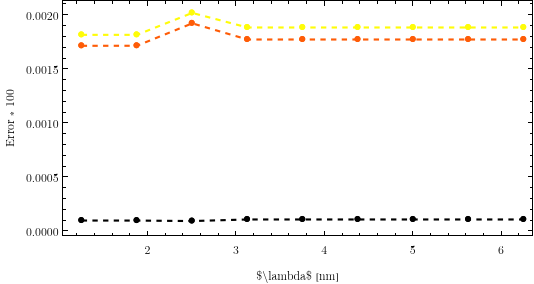

In [788]:
i = 19;

wlength = data[[i, ;; ,1]];
sca = scatteringQ[wlength];
ext = extinctionQ[wlength];
abs = ext - sca;

dist = data[[i,;;,2]];
dist = dist *radius;

order = {3, 4, 5};
error =  Which[ # == 5, Abs[ext-data[[i, ;;, #]]],
                 # == 4, Abs[abs - data[[i, ;;, #]]],
                 # == 3, Abs[sca - data[[i, ;;, #]]]
        ] & /@ order;

plots[[2]] = ListPlot[Transpose[{dist,#}]& /@ error,
        FrameLabel -> { "$\\lambda$ [nm]", "Error * 100"}, 
        ImageSize -> 400,
        AspectRatio -> 1/2,
        Joined -> True,
        PlotStyle -> (Directive[Dashed,ColorData[3,#]]&/@{1,2,3}),
        DataRange -> wlength[[{1,-1}]]
]

-Graphics-
1-Air.pdf
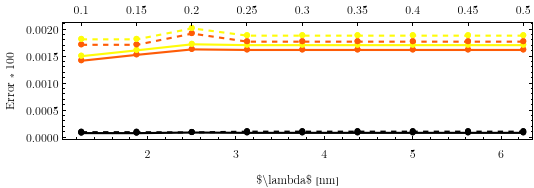

In [798]:
plots = Show[plots, AspectRatio -> 1/4, PlotRange -> Full]
Export["1-Air.pdf", plots]

## RAdius Mesh Glass

In [800]:
plots = { 0, 0};

-Graphics-
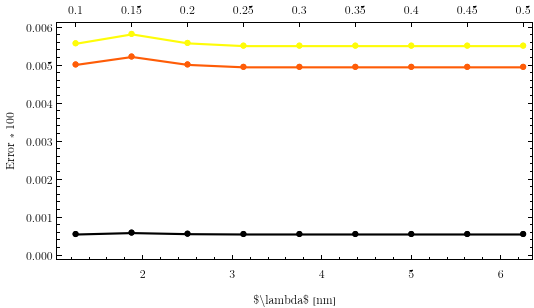

In [836]:
i = 20;
nMat = 1.5&;

wlength = data[[i, ;; ,1]];
sca = scatteringQ[wlength];
ext = extinctionQ[wlength];
abs = ext - sca;

dist = data[[i,;;,2]];
dist = dist*radius;
topTicks = Transpose[{dist,dist/radius}];

order = {3, 4, 5};
error =  Which[ # == 5, Abs[ext-data[[i, ;;, #]]],
                 # == 4, Abs[abs - data[[i, ;;, #]]],
                 # == 3, Abs[sca - data[[i, ;;, #]]]
        ] & /@ order;

plots[[1]] = ListPlot[Transpose[{dist,#}]& /@ error,
        FrameLabel -> { "$\\lambda$ [nm]", "Error * 100"}, 
        ImageSize -> 400,
        AspectRatio -> 1/2,
        FrameTicks -> {{Automatic,Automatic},{Automatic, topTicks}},
        Joined -> True,
        DataRange -> wlength[[{1,-1}]]
]

-Graphics-
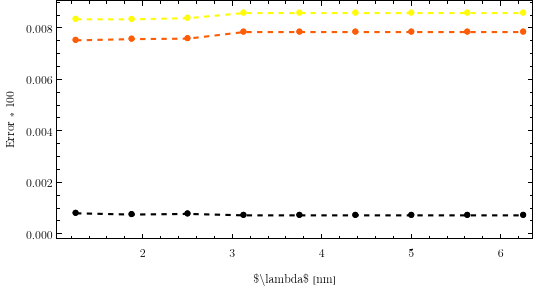

In [826]:
i = 21;

wlength = data[[i, ;; ,1]];
sca = scatteringQ[wlength];
ext = extinctionQ[wlength];
abs = ext - sca;

dist = data[[i,;;,2]];
dist = dist *radius;

order = {3, 4, 5};
error =  Which[ # == 5, Abs[ext-data[[i, ;;, #]]],
                 # == 4, Abs[abs - data[[i, ;;, #]]],
                 # == 3, Abs[sca - data[[i, ;;, #]]]
        ] & /@ order;

plots[[2]] = ListPlot[Transpose[{dist,#}]& /@ error,
        FrameLabel -> { "$\\lambda$ [nm]", "Error * 100"}, 
        ImageSize -> 400,
        AspectRatio -> 1/2,
        Joined -> True,
        PlotStyle -> (Directive[Dashed,ColorData[3,#]]&/@{1,2,3}),
        DataRange -> wlength[[{1,-1}]]
]

-Graphics-
1-Glass.pdf
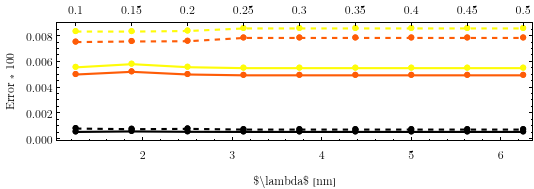

In [848]:
plots = Show[plots, AspectRatio -> 1/4, PlotRange -> Full]
Export["1-Glass.pdf", plots]

# Convergenced

-Graphics-
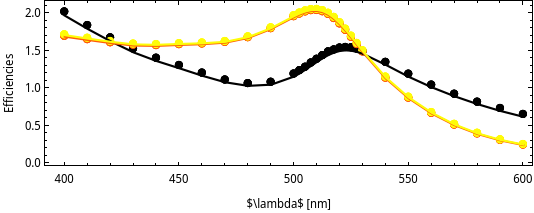

In [514]:
(* Order of the efficencies sca, abs, ext*)
i = 22;
order = {2, 3, 4};
nMat = 1.&;
wlength = data[[i, ;; ,1]];
sca = scatteringQ[wlength];
ext = extinctionQ[wlength];
abs = ext - sca;

amp = 100; (*Qext / Qsca ~ 100*)
amp1 = 4;
plots[[1]] = Show[{
    ListLinePlot[If[# == 2, 
               data[[i, ;;, {1, #}]] /. {x_, y_} -> {x, amp1*amp*y},
               (*else*)
               data[[i, ;;, {1, #}]]/. {x_, y_} -> {x,amp1* y}
             ] & /@ order,
            FrameLabel -> { "$\\lambda$ [nm]", "Efficiencies"}, 
            ImageSize -> 400,
            Joined -> False,
            AspectRatio -> 1/2.96
    ],
  ListLinePlot[Transpose[{wlength,#}]& /@ {sca*amp*amp1,amp1* abs,amp1* ext}, Mesh -> None]
  }]


{{0.121746, 0.113307, 0.115113, 0.115314, 0.0936188, 0.0946349, 0.0901862, 0.0769846, 
 
>    0.0759358, 0.0811957, 0.0854693, 0.0891096, 0.0812779, 0.0935881, 0.0880397, 
 
>    0.0863747, 0.104389, 0.0870696, 0.0976375, 0.0965767, 0.0996925, 0.096889, 
 
>    0.0757514, 0.0832873, 0.0885134, 0.0723745, 0.0694797, 0.0663047, 0.0837894, 
 
>    0.0792502}, {0.105721, 0.0955639, 0.104408, 0.0961925, 0.0950496, 0.102343, 
 
>    0.0946729, 0.102774, 0.0959967, 0.104758, 0.124808, 0.128154, 0.138383, 0.14577, 
 
>    0.152455, 0.159687, 0.165486, 0.160258, 0.186864, 0.159391, 0.157854, 0.153959, 
 
>    0.139571, 0.109687, 0.0846561, 0.062562, 0.0512906, 0.0345129, 0.027988, 0.0219891}\
 
>    , {0.117896, 0.106895, 0.11592, 0.107724, 0.104411, 0.111807, 0.103692, 0.110472, 
 
>    0.10359, 0.112878, 0.133354, 0.137065, 0.146511, 0.155129, 0.161259, 0.168324, 
 
>    0.175925, 0.168964, 0.196628, 0.169048, 0.167823, 0.163647, 0.147146, 0.118016, 
 
>    0.0935074, 0.0697994, 0.0582386, 0.0411434, 0.0363669, 0.0299142}}
-Graphics-
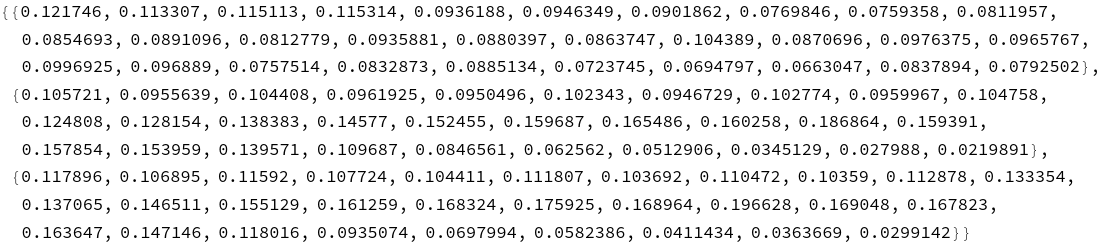
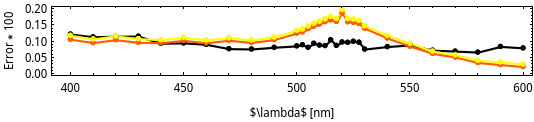

In [525]:
error = 100* Which[ # == 4, Abs[ext-data[[i, ;;, #]]],
                 # == 3, Abs[abs - data[[i, ;;, #]]],
                 # == 2,10* Abs[sca - data[[i, ;;, #]]]
        ] & /@ order


plots[[2]] = ListPlot[Transpose[{wlength,#}]& /@ error,
        FrameLabel -> { "$\\lambda$ [nm]", "Error * 100"}, 
        ImageSize -> 400,
        AspectRatio -> 1/7,
        Joined -> True,
        DataRange -> wlength[[{1,-1}]]
        ]

-Graphics-
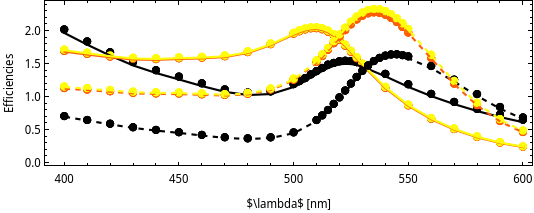

In [527]:
(* Order of the efficencies sca, abs, ext*)
i = 23;
amp = 30; (*Qext / Qsca ~ 100*)
order = {2, 3, 4};

nMat = 1.5&;
wlength = data[[i, ;; ,1]];
sca = scatteringQ[wlength];
ext = extinctionQ[wlength];
abs = ext - sca;

plots[[1]] = Show[{
plots[[1]],
    ListLinePlot[If[# == 2, 
               data[[i, ;;, {1, #}]] /. {x_, y_} -> {x, amp*y},
               (*else*)
               data[[i, ;;, {1, #}]]
             ] & /@ order,
            FrameLabel -> { "$\\lambda$ [nm]", "Efficiencies"}, 
            ImageSize -> 400,
            Joined -> False,
            AspectRatio -> 1/2.96
    ],
  ListLinePlot[Transpose[{wlength,#}]& /@ {sca*amp, abs, ext}, Mesh -> None, PlotStyle -> Table[Directive[Dashed,ColorData[3,i]],{i,3}]]
  },PlotRange -> All]

{{0.0101226, 0.00851485, 0.0113954, 0.0111094, 0.0109153, 0.0117046, 0.00987945, 
 
>    0.00925254, 0.010073, 0.00938343, 0.0114629, 0.0176603, 0.0193868, 0.0207581, 
 
>    0.0268735, 0.0255412, 0.0280279, 0.0361229, 0.0408151, 0.0460014, 0.0537605, 
 
>    0.061269, 0.0626842, 0.0722503, 0.0796206, 0.086361, 0.0797613, 0.0902915, 
 
>    0.0910587, 0.0887238, 0.0786065, 0.0699465, 0.0581894}, 
 
>   {0.0137035, 0.0131998, 0.0128908, 0.0128397, 0.0114993, 0.0109399, 0.0106612, 
 
>    0.00914201, 0.0076517, 0.0065423, 0.00488915, 0.00379874, 0.004207, 0.00508336, 
 
>    0.005684, 0.00933206, 0.01204, 0.0191065, 0.0245346, 0.0329303, 0.039889, 
 
>    0.0502826, 0.058013, 0.0638104, 0.0728557, 0.0795028, 0.0842745, 0.0868238, 
 
>    0.0850468, 0.065644, 0.0494125, 0.0360046, 0.023706}, 
 
>   {0.0147158, 0.0140512, 0.0140304, 0.0139507, 0.0125908, 0.0121104, 0.0116491, 
 
>    0.0100673, 0.00865901, 0.00748064, 0.00603545, 0.00556477, 0.00614568, 0.00715917, 
 
>    0.00837135, 0.0118862, 0.0148427, 0.0227188, 0.0286161, 0.0375304, 0.0452651, 
 
>    0.0564095, 0.0642814, 0.0710354, 0.0808177, 0.0881389, 0.0922506, 0.095853, 
 
>    0.0941527, 0.0745164, 0.0572731, 0.0429992, 0.0295249}}
-Graphics-
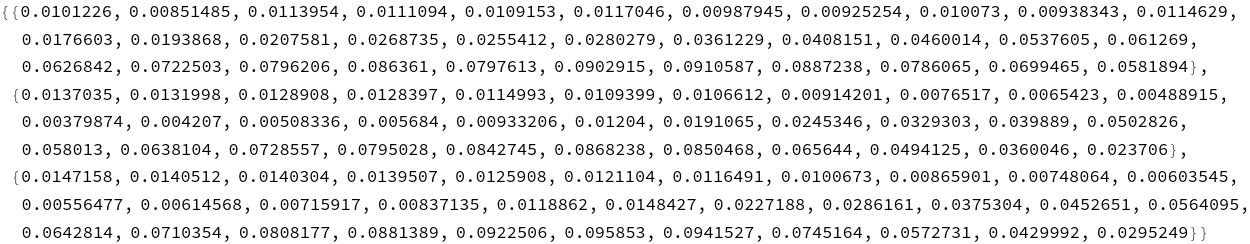
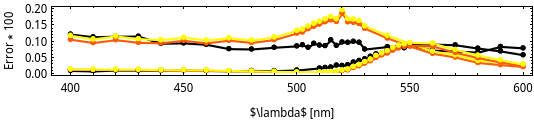

In [537]:
error = 10* Which[ # == 4, Abs[ext-data[[i, ;;, #]]],
                 # == 3, Abs[abs - data[[i, ;;, #]]],
                 # == 2,10* Abs[sca - data[[i, ;;, #]]]
        ] & /@ order


Show[{plots[[2]],
ListPlot[Transpose[{wlength,#}]& /@ error,
        FrameLabel -> { "$\\lambda$ [nm]", "Error * 100"}, 
        ImageSize -> 400,
        AspectRatio -> 1/7,
        Joined -> True,
        PlotStyle -> Table[Directive[Dashed,ColorData[3,i]],{i,3}]
        ]
        },PlotRange -> All]

In [341]:
Export["0-NoConv-"<>ToString[#]<>".pdf", plots[[#]]]&/@Range[Length[plots]]

{0-NoConv-1.pdf, 0-NoConv-2.pdf}